In [124]:
# Import Data Load Library
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import glob

from skimage.feature import hog
from skimage import exposure
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import torchvision.models as models
from torchvision.models import ResNet18_Weights, ResNet50_Weights
import torchvision.transforms as transforms
from PIL import Image
import cv2

# **Load Data Image**

In [ ]:
cv_img = cv2.imread(r'')
img_rgb = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)

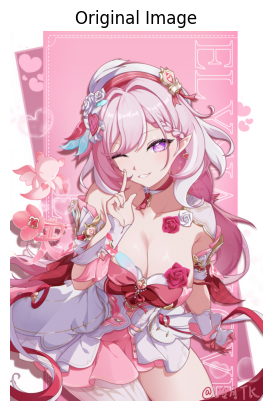

In [126]:
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

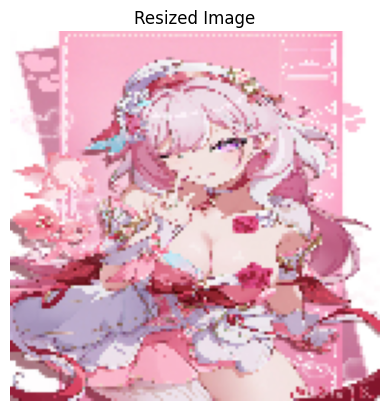

In [127]:
resized = cv2.resize(img_rgb, (128, 128))
plt.imshow(resized)
plt.title("Resized Image")
plt.axis('off')
plt.show()

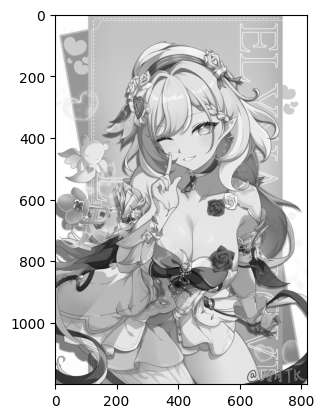

In [128]:
gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

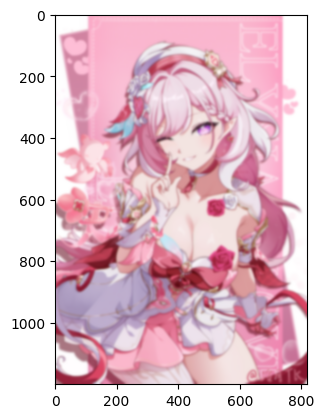

In [129]:
blur = cv2.GaussianBlur(img_rgb, (21,21), 0)
cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)

plt.imshow(blur)
plt.show()

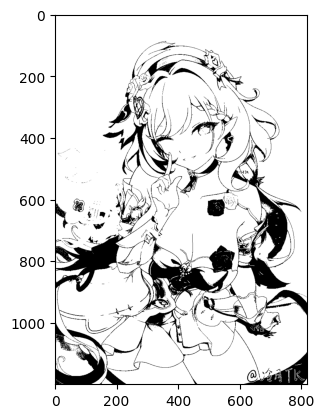

In [130]:
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')
plt.show()


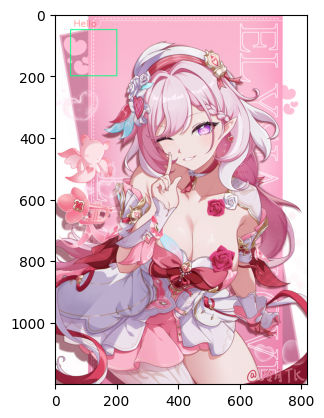

In [131]:
# Draw a rectangle
img_copy = img_rgb.copy()
cv2.rectangle(img_copy, (50, 50), (200, 200), (0,255,127), 2)  # Green rectangle
cv2.putText(img_copy, "Hello", (60, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 1)
cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)

plt.imshow(img_copy)
plt.show()


# **Anime Character Classifier**

56
The label for the first image (data[0]) is: 'not_sushang'

Visualizing HOG (Histogram of Oriented Gradients) features...
Grayscale histogram shape: (32, 1)
HOG feature vector shape: (30276,)


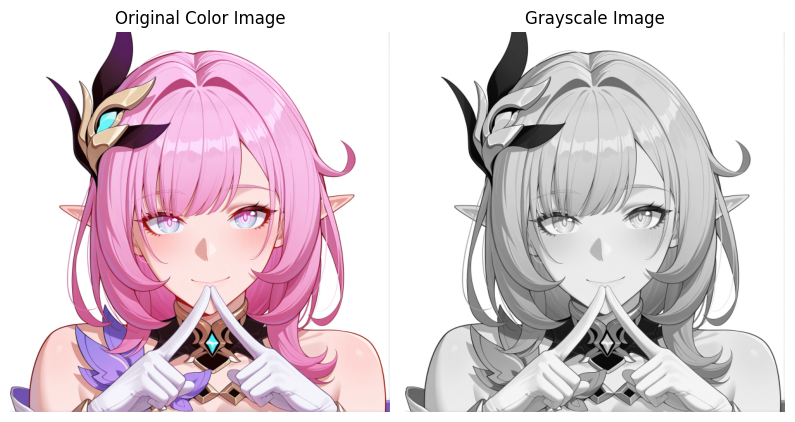

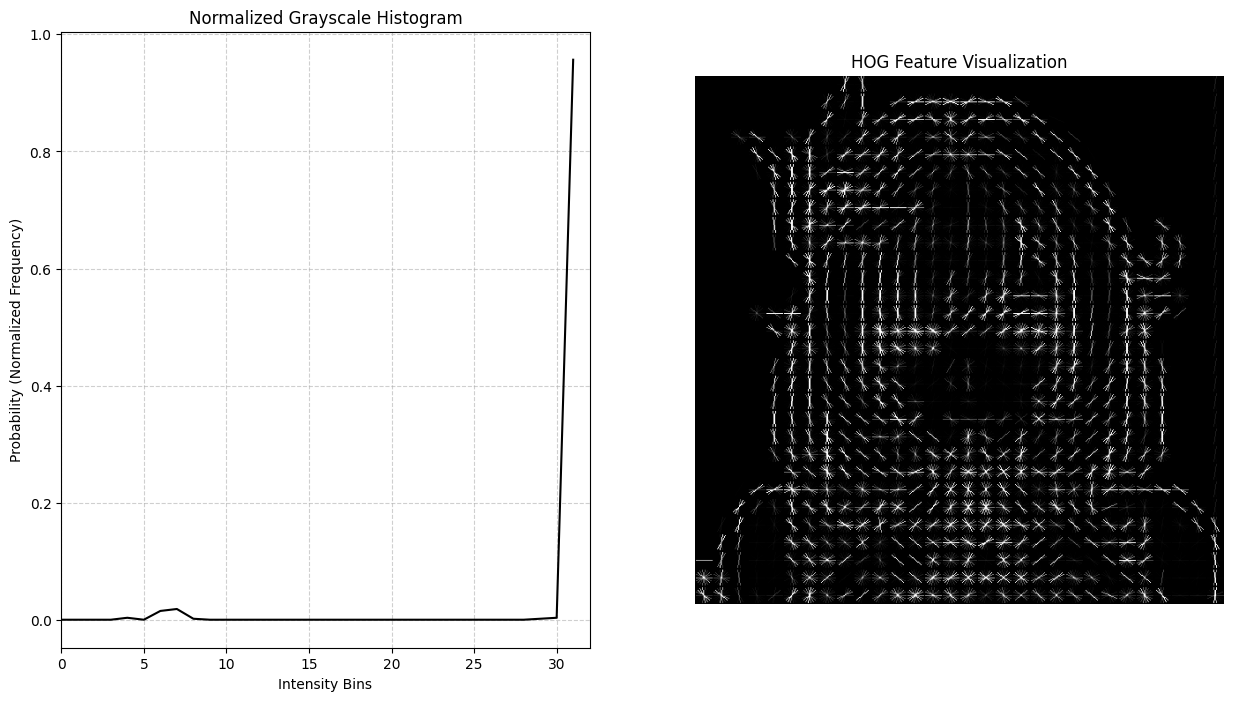

In [ ]:
dataset_path = r""
data = []
labels = []

if not os.path.exists(dataset_path):
    print(f"Error: Dataset path not found at '{dataset_path}'")
else:
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        
        if not os.path.isdir(class_path):
            continue

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = cv2.imread(img_path)

            if img is not None:
                img_resized = cv2.resize(img, (600, 600)) # Standardize size
                data.append(img_resized)
                labels.append(class_name)

print(len(data))
print(f"The label for the first image (data[0]) is: '{labels[0]}'")
sample_image = data[10]
# 1. First Image: Original Color
img_color = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

# 2. Second Image: Grayscale version
img_gray = cv2.cvtColor(sample_image, cv2.COLOR_BGR2GRAY)

BINS = 32 # Use 32 bins

# Calculate the histogram
hist = cv2.calcHist(img_gray, [0], None, [BINS], [0,256])

# Normalize the histogram (so the area under the curve is 1)
cv2.normalize(hist, hist, alpha=1.0, beta=0.0, norm_type=cv2.NORM_L1)

# --- HOG Features (The better feature for this task) ---
print("\nVisualizing HOG (Histogram of Oriented Gradients) features...")

# Calculate HOG features and a visualization
fd, hog_image = hog(img_gray, orientations=9, pixels_per_cell=(20, 20),
                    cells_per_block=(2, 2), visualize=True)

# Enhance the HOG image for better contrast
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

print(f"Grayscale histogram shape: {hist.shape}")
print(f"HOG feature vector shape: {fd.shape}")

# --- Plotting ---
# Create a figure to contain the plots

plt.figure(figsize=(12, 8))
# Plot 1: The Color Image
plt.subplot(1, 3, 1) # (1 row, 2 columns, index 1)
plt.imshow(img_color)
plt.title("Original Color Image")
plt.axis('off') # Hide axes

# Plot 2: The Grayscale Image
plt.subplot(1, 3, 2) # (1 row, 2 columns, index 2)
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off') # Hide axes

# Adjust layout to prevent titles from overlapping
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.plot(hist, color='black')
plt.title("Normalized Grayscale Histogram")
plt.xlabel("Intensity Bins")
plt.ylabel("Probability (Normalized Frequency)")
plt.xlim([0, BINS])
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(1, 2, 2)
plt.imshow(hog_image_rescaled, cmap='gray')
plt.title("HOG Feature Visualization")
plt.axis('off')
plt.show()

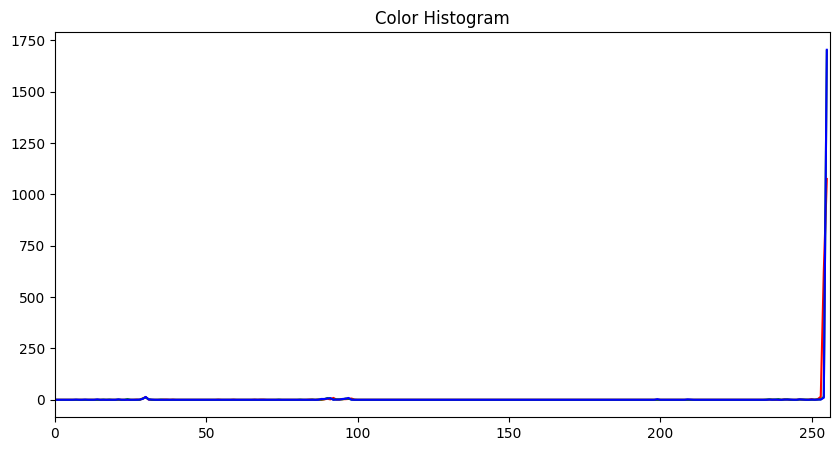

In [133]:
colors = ('r', 'g', 'b')
plt.figure(figsize=(10, 5))
for i, col in enumerate(colors):
    hist = cv2.calcHist(data[10], [i], None, [256], [0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])

plt.title("Color Histogram")
plt.show()

In [134]:
# def detect_face_with_rotation(image):
#     img_copy = image.copy()
#     gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
#     center = (gray.shape[1] // 2, gray.shape[0] // 2)
    
#     # Try different angles
#     for angle in [-10, -5, 0, 5, 10]:
#         rot_mat = cv2.getRotationMatrix2D(center, angle, 1.0)
#         rotated_gray = cv2.warpAffine(gray, rot_mat, (gray.shape[1], gray.shape[0]))
        
#         # Use stricter parameters to avoid false positives
#         faces = face_cascade.detectMultiScale(rotated_gray, scaleFactor=1.05, minNeighbors=5, minSize=(50, 50))
        
#         if len(faces) > 0:
#             print(f"Found face at {angle} degrees!")
#             return faces # Return the first set of faces found
            
#     return [] # Return empty if no faces found

# dataset_path = r"C:\Users\nurul\Documents\ITTS Tugas Perkuliahan\Referensi img\leaf-classification\training_images"

# data = []
# labels = []
# label_map = {}  # To store numeric label mapping
# label_counter = 0

# face_cascade = cv2.CascadeClassifier('lbpcascade_animeface.xml')
# recognizer = cv2.face.LBPHFaceRecognizer_create(radius=2, neighbors=8, grid_x=17, grid_y=17)

# if not os.path.exists(dataset_path):
#     print(f"Error: Dataset path not found at '{dataset_path}'")
# else:
#     for class_name in os.listdir(dataset_path):
#         class_path = os.path.join(dataset_path, class_name)
        
#         if not os.path.isdir(class_path):
#             continue

#         if class_name not in label_map:
#             label_map[class_name] = label_counter
#             label_counter += 1
            
#         for filename in os.listdir(class_path):
#             img_path = os.path.join(class_path, filename)
#             img = cv2.imread(img_path)
            
#             gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#             faces = faces = detect_face_with_rotation(img)
            
#             if img is not None:
#                 # If no face detected, skip or use whole image
#                 if len(faces) == 0:
#                     print(f"🚫 No face found in: {filename}")
#                 else:
#                     print(f"✅ Found {len(faces)} face(s) in: {filename}")

#                 # Crop each detected face and store it
#                 for (x, y, w, h) in faces:
#                     # largest_face = max(faces, key=lambda rect: rect[2] * rect[3])
#                     # x, y, w, h = largest_face
#                     face_roi = gray[y:y+h, x:x+w]
#                     face_resized = cv2.resize(face_roi, (400, 400))
                    
#                     data.append(face_resized)
#                     labels.append(label_map[class_name])
                    
#                     cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)

#                 plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#                 plt.title(f"Detected faces in {filename}")
#                 plt.axis('off')
#                 plt.show()
#             else:
#                 print(f"Warning: Could not read file: {img_path}")

# data = np.array(data)
# labels = np.array(labels)

# print("\n✅ Dataset ready.")
# print(f"Total detected faces: {len(data)}")
# print("Label map:", label_map)

# # --- Train LBPH Face Recognizer ---
# if len(data) > 0:
#     recognizer.train(data, labels)
#     print("\n✅ Training complete.")
# else:
#     print("❌ No data to train on. Please check face detection results.")

# # --- Test a random image (optional demo) ---
# if len(data) > 0:
#     test_index = 9 # Define the index once
#     test_img = data[test_index]
#     test_label = labels[test_index]
#     predicted_label, confidence = recognizer.predict(test_img)

#     # Reverse lookup of label name
#     class_names = {v: k for k, v in label_map.items()}
#     true_name = class_names[test_label]
#     predicted_name = class_names[predicted_label]

#     # Display
#     plt.imshow(test_img, cmap='gray')
#     plt.title(f"True: {true_name}\nPredicted: {predicted_name}\nConfidence: {confidence:.2f}")
#     plt.axis('off')
#     plt.show()

In [220]:
def create_character_mask(image):
    """
    Creates a binary mask that isolates the character from a white background.
    """
    # Convert to grayscale to work with a single channel
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Threshold the image. Pixels that are not pure white (value < 255) will be
    # turned white (255) in the mask, isolating the character.
    # cv2.THRESH_BINARY_INV inverts the selection.
    _, mask = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # --- Optional but recommended: Clean up the mask ---
    # Use MORPH_OPEN to remove small white noise dots in the background
    kernel = np.ones((5,5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
    
    # Use MORPH_CLOSE to fill small black holes within the character
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)
    
    return mask

Shape of new masked grayscale features: (56, 32)


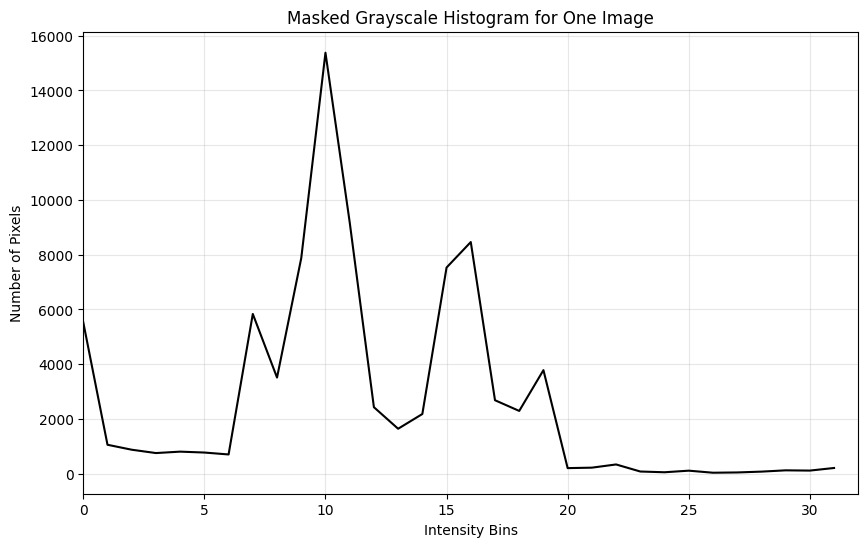

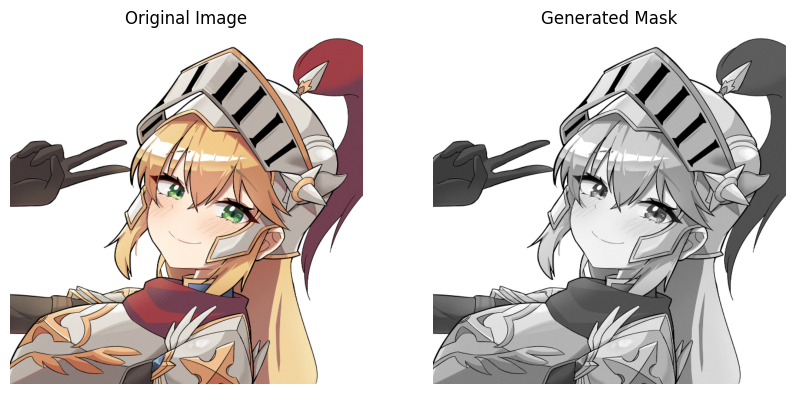

In [221]:
BINS = 32
features = []

for img in data:
    # 1. Create the precise mask for the character
    mask = create_character_mask(img)
    
    # 2. Convert the original image to grayscale for the histogram
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # 3. Calculate histogram using ONLY the pixels within the mask
    hist = cv2.calcHist([gray_img], [0], mask, [BINS], [0,256])
    
    # 4. Normalize and store the features
    hist = cv2.normalize(hist, hist).flatten()
    features.append(hist)

features_masked = np.array(features)
print(f"Shape of new masked grayscale features: {features_masked.shape}")

grayscaled_image = data[0]

# Re-create the mask and grayscale image for our grayscaled
grayscaled_mask = create_character_mask(grayscaled_image)
grayscaled_gray = cv2.cvtColor(grayscaled_image, cv2.COLOR_BGR2GRAY)

# Calculate the histogram for visualization
# Note: We don't need to normalize it for the plot
hist_to_plot = cv2.calcHist([grayscaled_gray], [0], grayscaled_mask, [BINS], [0,256])

# --- Plotting the Histogram ---
plt.figure(figsize=(10, 6))
plt.title("Masked Grayscale Histogram for One Image")
plt.xlabel("Intensity Bins")
plt.ylabel("Number of Pixels")
plt.plot(hist_to_plot, color='black')
plt.xlim([0, BINS]) # Limit x-axis to the number of bins
plt.grid(True, alpha=0.3)
plt.show()

# You can also display the image and the mask to see what was analyzed
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(cv2.cvtColor(grayscaled_image, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(grayscaled_gray, cmap='gray')
ax2.set_title('Generated Mask')
ax2.axis('off')

plt.show()


Training SVM classifier...
Running GridSearchCV to find the best parameters for 'sushang' recall...
Fitting 5 folds for each of 14 candidates, totalling 70 fits

✅ Grid search complete!
Best parameters found: {'C': 5.5, 'kernel': 'rbf'}
Best recall score (on validation folds): 0.93
Training Set Accuracy: 97.62%
------------------------------
Masked Histogram Accuracy: 85.71%
------------------------------
Inspecting individual predictions from the test set...



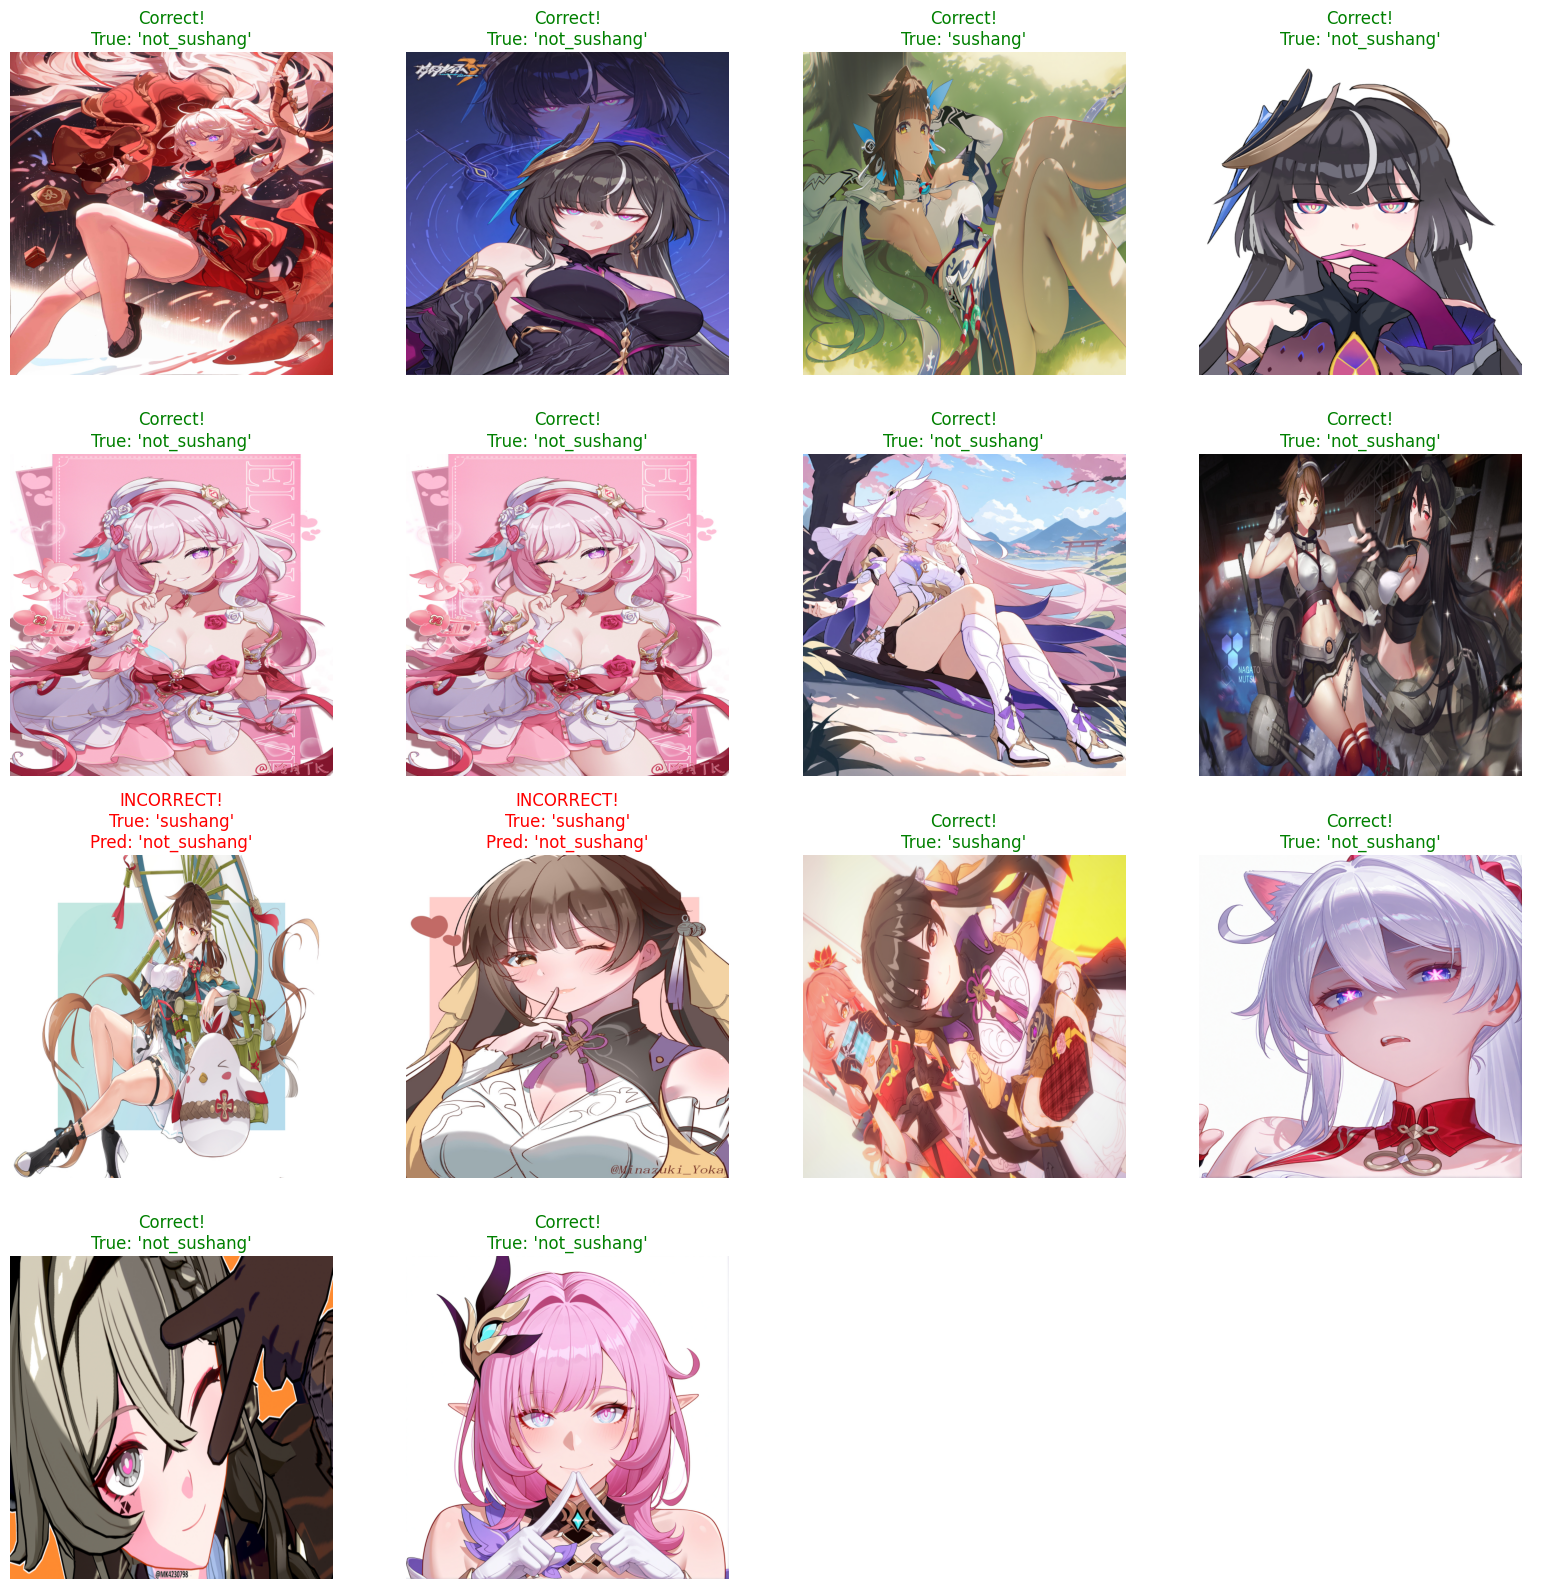

In [222]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, recall_score

# --- 1. Split ALL your data: features, labels, AND original images ---
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(
    features_masked,
    labels,
    data,
    test_size=0.25,
    random_state=42,
    stratify=labels
)

# --- 2. SETUP AND RUN GridSearchCV ---
print("\nTraining SVM classifier...")
print("Running GridSearchCV to find the best parameters for 'sushang' recall...")

# --- A. Define the Parameter Grid ---
# A grid of parameters to test. We'll try both linear and rbf kernels.
param_grid = {
    'C': [0.1, 0.5, 1, 3, 5.5, 10, 100],
    'kernel': ['linear', 'rbf'],
}

# --- B. Define the Scoring Metric ---
# We want to optimize for the recall of the 'sushang' class.
# !IMPORTANT: Replace 'sushang' if your label has different capitalization.
pos_label = 'sushang'
recall_scorer = make_scorer(recall_score, pos_label=pos_label)

# --- C. Run the Grid Search ---
# We use 3-fold cross-validation on the TRAINING data.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=SVC(gamma='scale', probability=True),
    param_grid=param_grid,
    scoring=recall_scorer,  # <-- Tell it to optimize for our recall scorer
    cv=skf,
    verbose=1,              # So you can see its progress
    n_jobs=-1               # Use all available CPU cores
)

# Fit the grid search to find the best model
grid_search.fit(X_train, y_train)

# --- D. Get the Best Model ---
print("\n✅ Grid search complete!")
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best recall score (on validation folds): {grid_search.best_score_:.2f}")
clf = grid_search.best_estimator_  # This is your new, optimized classifier!

y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)

# Calculate and print the training accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Set Accuracy: {train_accuracy * 100:.2f}%")
print("-" * 30)

accuracy = accuracy_score(y_test, y_pred)
print(f"Masked Histogram Accuracy: {accuracy*100:.2f}%")
print("-" * 30)

# --- 5. NEW: Inspect Individual Predictions ---
print("Inspecting individual predictions from the test set...\n")

n_images = len(images_test)
# Define the grid size (e.g., 4 columns)
n_cols = 4
n_rows = (n_images + n_cols - 1) // n_cols # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each item in the test set
for i in range(n_images):
    # Get the data for the current image
    image = images_test[i]
    true_label = y_test[i]
    predicted_label = y_pred[i]
    
    # Convert image for display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Determine the title and color
    if true_label == predicted_label:
        title_text = f"Correct!\nTrue: '{true_label}'"
        title_color = 'green'
    else:
        title_text = f"INCORRECT!\nTrue: '{true_label}'\nPred: '{predicted_label}'"
        title_color = 'red'
        
    # Plot the image on its subplot
    ax = axes[i]
    ax.imshow(image_rgb)
    ax.set_title(title_text, color=title_color, fontsize=12)
    ax.axis('off')

# Hide any unused subplots
for i in range(n_images, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# --- Now, visualize the predictions for the TRAINING set ---
print("Inspecting individual predictions from the TRAINING set...\n")

n_images = len(images_train)
# Define the grid size (e.g., 4 columns)
n_cols = 4
n_rows = (n_images + n_cols - 1) // n_cols # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each item in the TRAINING set
for i in range(n_images):
    # Get the data for the current image using the _train variables
    image = images_train[i]
    true_label = y_train[i]
    predicted_label = y_pred_train[i]
    
    # Convert image for display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Determine the title and color
    if true_label == predicted_label:
        title_text = f"Correct!\nTrue: '{true_label}'"
        title_color = 'green'
    else:
        title_text = f"INCORRECT!\nTrue: '{true_label}'\nPred: '{predicted_label}'"
        title_color = 'red'
        
    # Plot the image on its subplot
    ax = axes[i]
    ax.imshow(image_rgb)
    ax.set_title(title_text, color=title_color, fontsize=12)
    ax.axis('off')

# Hide any unused subplots
for i in range(n_images, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

test_folder_path = r""
all_true_labels = []
all_predictions = []

# --- PREDICTION LOOP ---
print(f"Testing model on images in: {test_folder_path}")

if not os.path.exists(test_folder_path):
    print(f"Error: Folder not found at '{test_folder_path}'")
else:
    for class_name in os.listdir(test_folder_path):
        class_path = os.path.join(test_folder_path, class_name)
        if not os.path.isdir(class_path):
            continue

        # Loop through every file in the class subfolder
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            image = cv2.imread(img_path)
        
            # Check if the image was loaded successfully
            if image is not None:
                
                # --- STEP A: Apply the IDENTICAL Preprocessing Pipeline ---
                # Resize to the same size as your training data (e.g., 180x180)
                resized_image = cv2.resize(image, (600, 600))
                
                # --- STEP B: Apply the IDENTICAL Feature Extraction ---
                mask = create_character_mask(resized_image)
                gray_img = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
                
                # Calculate the histogram feature
                hist_feature = cv2.calcHist([gray_img], [0], mask, [BINS], [0, 256])
                hist_feature = cv2.normalize(hist_feature, hist_feature).flatten()
                
                # --- STEP C: Predict using the Trained Model ---
                # Reshape the feature for the model (it expects a 2D array)
                reshaped_feature = hist_feature.reshape(1, -1)
                
                # Use the trained classifier to predict
                prediction = clf.predict(reshaped_feature)
                predicted_label = prediction[0] # Get the label from the array
                
                # --- STEP D: Display the Result ---
                image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                plt.figure(figsize=(6, 6))
                plt.imshow(image_rgb)
                plt.title(f"Prediction: '{predicted_label}'", fontsize=16)
                plt.axis('off')
                plt.show()
                
                # Append the results to our lists
                all_true_labels.append(class_name) # The folder name is the TRUE label
                all_predictions.append(predicted_label)
                
            else:
                print(f"Warning: Could not read image file: {filename}")
                
# 1. Overall Accuracy
accuracy = accuracy_score(all_true_labels, all_predictions)
print("-" * 50)
print(f"Final Accuracy on Test Folder: {accuracy * 100:.2f}%")
print("-" * 50)

# 2. Detailed Classification Report
print("Classification Report:")
print(classification_report(all_true_labels, all_predictions))
print("-" * 50)